<a href="https://colab.research.google.com/github/Storm00212/Data-manipulation-using-python/blob/main/Newton_Forward_difference_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Newton's Forward Difference Interpolation Example

# Define the data points (x values and corresponding y values)
x = np.array([0, 1, 2, 3, 4], dtype=float)
y = np.array([1, 8, 27, 64, 125], dtype=float)  # Here f(x) = x^3

# Number of data points
n = len(x)

In [ ]:
# Create and fill the forward difference table
diff_table = np.zeros((n, n))
diff_table[:, 0] = y

for j in range(1, n):
    for i in range(n - j):
        diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]

# Display the forward difference table
print("Forward Difference Table:")
for i in range(n):
    print(diff_table[i, :n - i])


Forward Difference Table:
[ 1.  7. 12.  6.  0.]
[ 8. 19. 18.  6.]
[27. 37. 24.]
[64. 61.]
[125.]


In [ ]:
# Define a function to perform Newton's Forward Interpolation
def newton_forward(x_value, x, diff_table):
    n = len(x)
    h = x[1] - x[0]  # Assumes equal spacing
    s = (x_value - x[0]) / h  # Compute s = (x - x0) / h

    # Start with the first term of the series
    y_interp = diff_table[0][0]
    s_term = 1

    # Add successive terms using forward differences
    for i in range(1, n):
        s_term *= (s - i + 1) / i
        y_interp += s_term * diff_table[0][i]

    return y_interp


In [ ]:
# Choose a value to interpolate
x_value = 2.5
y_interp = newton_forward(x_value, x, diff_table)
print(f"\nInterpolated value at x = {x_value} is approximately {y_interp:.4f}")



Interpolated value at x = 2.5 is approximately 42.8750


In [ ]:
# Compare with the actual value from f(x) = x^3
true_value = x_value**3
print(f"True value of f({x_value}) = {true_value:.4f}")
print(f"Interpolation error = {abs(true_value - y_interp):.6f}")


True value of f(2.5) = 15.6250
Interpolation error = 27.250000


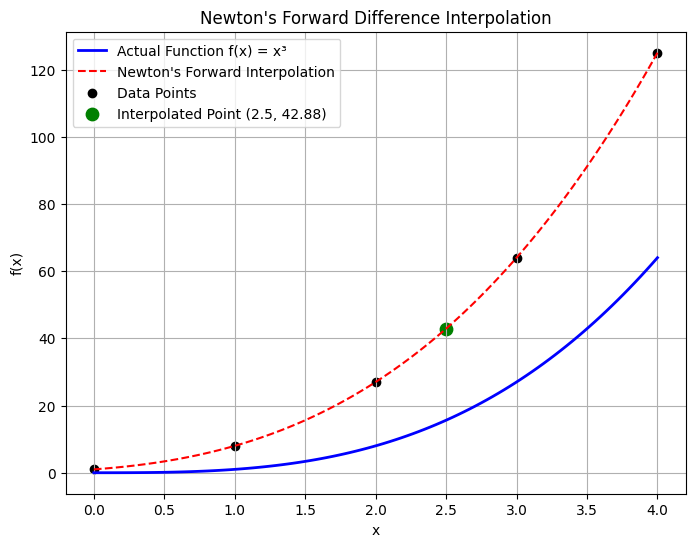

In [ ]:
# Visualization

# Create a smooth curve for the actual function
x_smooth = np.linspace(min(x), max(x), 100)
y_true = x_smooth**3

# Generate interpolated points for the same range
y_interp_points = [newton_forward(xi, x, diff_table) for xi in x_smooth]

plt.figure(figsize=(8, 6))
plt.plot(x_smooth, y_true, label='Actual Function f(x) = x³', color='blue', linewidth=2)
plt.plot(x_smooth, y_interp_points, label="Newton's Forward Interpolation", color='red', linestyle='--')
plt.scatter(x, y, color='black', label='Data Points')
plt.scatter(x_value, y_interp, color='green', s=80, label=f'Interpolated Point ({x_value}, {y_interp:.2f})')

plt.title("Newton's Forward Difference Interpolation")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Explanation:
# - The blue curve shows the actual cubic function.
# - The red dashed line represents the interpolation curve derived from discrete data points.
# - The green dot shows the interpolated value at x = 2.5.
# - The closer the red curve follows the blue one, the more accurate the interpolation is.